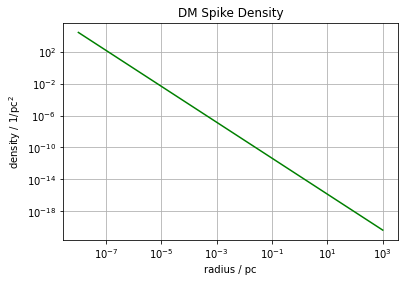

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the binary system 
m_bar = 1
m1 =  m_bar * ms.solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc


m2 = 1e-3 * ms.solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), 'g')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM Spike Density')
plt.savefig('spike density.pdf')
plt.show()

In [71]:
m_1 = 1e-3   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))


for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*np.exp(dy)))
    
print("m_1 = m_2 =", m_2_list, "M_solar")


Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     
print("Δ_1 = Δ_2 =", Δ_1_list, "M_solar")
    
    
    
    

def a(m_1,m_2,Δ_1,Δ_2):
    
    f_pbh = 4.3e-3
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 2.6
        M = 1e-4     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)

     

dy= 0.6931471805599454
m_1 = m_2 = [1.000e-03 5.010e-01 1.001e+00 1.501e+00 2.001e+00 2.501e+00 3.001e+00
 3.501e+00 4.001e+00 4.501e+00 5.001e+00 5.501e+00 6.001e+00 6.501e+00
 7.001e+00 7.501e+00 8.001e+00 8.501e+00 9.001e+00 9.501e+00] M_solar
Δ_1 = Δ_2 = [7.07814242e-01 1.16698840e+00 1.92403859e+00 3.17220335e+00
 5.23007914e+00 8.62294272e+00 1.42168291e+01 2.34395885e+01
 3.86453482e+01 6.37154075e+01 1.05048948e+02 1.73196434e+02
 2.85552646e+02 4.70796721e+02 7.76212567e+02 1.27975817e+03
 2.10996452e+03 3.47874338e+03 5.73547821e+03 9.45620491e+03] M_solar


In [74]:
def r_isko(m):
    return (6*G*m)/(c**2)




  

a_0 = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])


print("a_0 =" ,a_0)

a_0 = 0.04606757659597117


Evolving from  1599568631804.5544  to  1.0 r_isco  with initial eccentricity 0.7  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

Required step size is less than spacing between numbers.
 -> Evolution took 3.4326s
Evolving from  1599568631804.5544  to  1.0 r_isco  with initial eccentricity 0.6555555555555556  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3772s
Evolving from  1599568631804.5544  to  1.0 r_isco  with initial eccentricity 0.611111111111111  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3797s
Evolving from  1599568631804.5544  to  1.0 r_isco  with initial eccentricity 0.5666666666666667  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4782s
Evolving from  1599568631804.5544  to  1.0 r_isco  with initial eccentricity 0.5222222222222221  with  Options

/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

Required step size is less than spacing between numbers.
 -> Evolution took 3.4652s
Evolving from  1439611768624.099  to  1.0 r_isco  with initial eccentricity 0.6555555555555556  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4095s
Evolving from  1439611768624.099  to  1.0 r_isco  with initial eccentricity 0.611111111111111  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4889s
Evolving from  1439611768624.099  to  1.0 r_isco  with initial eccentricity 0.5666666666666667  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4889s
Evolving from  1439611768624.099  to  1.0 r_isco  with initial eccentricity 0.5222222222222221  with  Options: ac

/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

Required step size is less than spacing between numbers.
 -> Evolution took 3.4043s
Evolving from  1279654905443.6436  to  1.0 r_isco  with initial eccentricity 0.6555555555555556  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3546s
Evolving from  1279654905443.6436  to  1.0 r_isco  with initial eccentricity 0.611111111111111  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3740s
Evolving from  1279654905443.6436  to  1.0 r_isco  with initial eccentricity 0.5666666666666667  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4877s
Evolving from  1279654905443.6436  to  1.0 r_isco  with initial eccentricity 0.5222222222222221  with  Options

/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

Required step size is less than spacing between numbers.
 -> Evolution took 3.3875s
Evolving from  1119698042263.1882  to  1.0 r_isco  with initial eccentricity 0.6555555555555556  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.2764s
Evolving from  1119698042263.1882  to  1.0 r_isco  with initial eccentricity 0.611111111111111  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3176s
Evolving from  1119698042263.1882  to  1.0 r_isco  with initial eccentricity 0.5666666666666667  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4152s
Evolving from  1119698042263.1882  to  1.0 r_isco  with initial eccentricity 0.5222222222222221  with  Options

/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

Required step size is less than spacing between numbers.
 -> Evolution took 3.4183s
Evolving from  959741179082.7328  to  1.0 r_isco  with initial eccentricity 0.6555555555555556  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4343s
Evolving from  959741179082.7328  to  1.0 r_isco  with initial eccentricity 0.611111111111111  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3293s
Evolving from  959741179082.7328  to  1.0 r_isco  with initial eccentricity 0.5666666666666667  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.4896s
Evolving from  959741179082.7328  to  1.0 r_isco  with initial eccentricity 0.5222222222222221  with  Options: ac

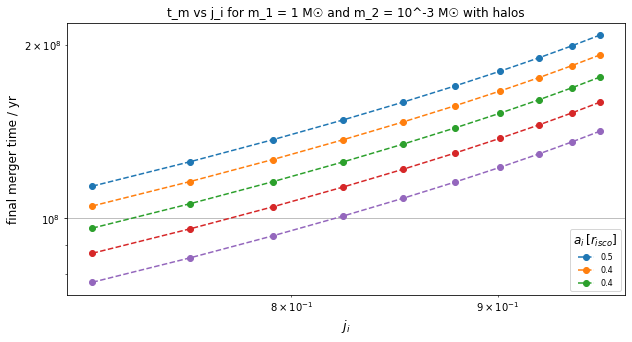

In [77]:
sp = ms.SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system

# Setting initial and final conditions of the binary evolution for an eccentric orbit

a0_array = np.linspace(10*a_0, 6*a_0, 5)

e0_array = np.linspace(0.7, 0.3, 10) 

a0_list = a0_array.tolist()            

e0_list = e0_array.tolist()


a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution



plt.figure(figsize = (10, 5))
t_m_list = np.zeros(len(e0_list))
j_i_list = np.zeros(len(e0_list))


for i, a0 in enumerate (a0_list):
    for k, e0 in enumerate (e0_list):
        a0 = a0_list[i] 
        e_0 = e0_list[k] 
        j_i_list[k] = np.sqrt(1 - (e0**2))
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
        t_m_list[k] = ev_ecc.t[-1]/ms.year_to_pc
    plt.loglog(j_i_list, t_m_list, '--o')
    
    
    
plt.legend([ '%0.1f'% a0_list[0], '%0.1f'% a0_list[1], '%0.1f'% a0_list[2] ], 
           title= '$a_{i} \hspace{0.2} [r_{isco}]$', 
            title_fontsize = 12, loc = 'lower right', prop = {"size":8})
plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('t_m vs j_i for m_1 = 1 M☉ and m_2 = 10^-3 M☉ with halos')
plt.grid()
plt.show()